In [10]:
import pandas as pd
#para tratamento de caracteres por meio de expressões regulares
import re
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# quando rodado no databricks
# #df_car_teste = pd.read_csv('/Volumes/worskpace_car_insurance/default/bronze/car_insurance_premium_dataset.csv')
#df_car = pd.read_csv('/Volumes/worskpace_car_insurance/default/bronze/car_insurance_premium_dataset_TEST.csv')

# quando rodado no vscode
df_car_teste = pd.read_csv('../dataset/datasets_bronze/car_insurance_premium_dataset_TEST.csv')
df_car = pd.read_csv('../dataset/datasets_bronze/car_insurance_premium_dataset.csv')

## Converter nomes de colunas para lowercase e Remover caracteres especiais e substituir espaços por _

In [12]:
import re

def padroniza_colunas(df):
    df_copy = df.copy()
    df_copy.columns = [re.sub(r'[^0-9a-zA-Z_]', '', col.lower().replace(' ', '_')) for col in df_copy.columns]
    return df_copy


In [13]:
df_car_teste_2 = padroniza_colunas(df_car_teste)
df_car_2 = padroniza_colunas(df_car)

## Identificar colunas com valores nulos

Não encontrei valores nulos, os dados que constam abaixos, são campos que tem 0 como valor e que faz sentido.

In [14]:
print("Dataframe de Treino: ")
display((df_car_2.isna() | (df_car_2 == '') | (df_car_2 == 0)).sum())
print("Dataframe de Teste: ")
display((df_car_teste_2.isna() | (df_car_teste_2 == '') | (df_car_teste_2 == 0)).sum())

Dataframe de Treino: 


driver_age                   0
driver_experience           47
previous_accidents         154
annual_mileage_x1000_km      0
car_manufacturing_year       0
car_age                     32
insurance_premium_           0
dtype: int64

Dataframe de Teste: 


driver_age                  0
driver_experience           5
previous_accidents         23
annual_mileage_x1000_km     0
car_manufacturing_year      0
car_age                     2
insurance_premium_          0
dtype: int64

## Calcular IQR

In [15]:
def outliers_iqr(df, colunas=None):
    if colunas is None:
        colunas = df.select_dtypes(include=['int64', 'float64']).columns
    
    outliers = pd.DataFrame(index=df.index)
    
    for col in colunas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = ~df[col].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    
    return outliers


In [16]:
nome_colunas = ['driver_age', 'driver_experience','previous_accidents', 'annual_mileage_x1000_km', 'car_manufacturing_year', 'car_age', 'insurance_premium_'] 

# IQR
outliers_iqr_teste = outliers_iqr(df_car_teste_2, nome_colunas)
print("Outliers por IQR Tabela Teste:")
display(outliers_iqr_teste.sum())

outliers_iqr_treino = outliers_iqr(df_car_2, nome_colunas)
print("Outliers por IQR Tabela Treino:")
display(outliers_iqr_treino.sum())

Outliers por IQR Tabela Teste:


driver_age                 0
driver_experience          0
previous_accidents         0
annual_mileage_x1000_km    0
car_manufacturing_year     0
car_age                    0
insurance_premium_         0
dtype: int64

Outliers por IQR Tabela Treino:


driver_age                 0
driver_experience          0
previous_accidents         0
annual_mileage_x1000_km    0
car_manufacturing_year     0
car_age                    0
insurance_premium_         0
dtype: int64

## Z-score para variáveis numéricas

In [17]:
def outliers_zscore(df, colunas=None, threshold=3):
    if colunas is None:
        colunas = df.select_dtypes(include=['int64', 'float64']).columns
    
    outliers = pd.DataFrame(index=df.index)
    
    for col in colunas:
        z_scores = stats.zscore(df[col])
        outliers[col] = abs(z_scores) > threshold
    
    return outliers


In [18]:
# Z-score
outliers_z_teste = outliers_zscore(df_car_teste_2, nome_colunas)
print("Outliers por Z-score Tabela Teste:")
display(outliers_z_teste.sum())

outliers_z_treino = outliers_zscore(df_car_2, nome_colunas)
print("Outliers por IQR Tabela Treino:")
display(outliers_z_treino.sum())

Outliers por Z-score Tabela Teste:


driver_age                 0
driver_experience          0
previous_accidents         0
annual_mileage_x1000_km    0
car_manufacturing_year     0
car_age                    0
insurance_premium_         0
dtype: int64

Outliers por IQR Tabela Treino:


driver_age                 0
driver_experience          0
previous_accidents         0
annual_mileage_x1000_km    0
car_manufacturing_year     0
car_age                    0
insurance_premium_         0
dtype: int64

### Ao aplicar os métodos de detecção de outliers (IQR e Z-score) nas variáveis numéricas, não foram identificados valores extremos. Isso indica que os dados estão bem distribuídos dentro dos limites esperados e não apresentam pontos discrepantes significativos que precisem de tratamento.

# Validar visualmente com boxplots

In [19]:
def gerar_boxplots(df, colunas=None, titulo="Boxplots"):
    if colunas is None:
        colunas = df.select_dtypes(include=['int64', 'float64']).columns

    n_cols = len(colunas)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 5), squeeze=False)
    
    for i, col in enumerate(colunas):
        sns.boxplot(y=df[col], ax=axes[0, i])
        axes[0, i].set_title(col)
    
    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()


Dataframe de Treino: 


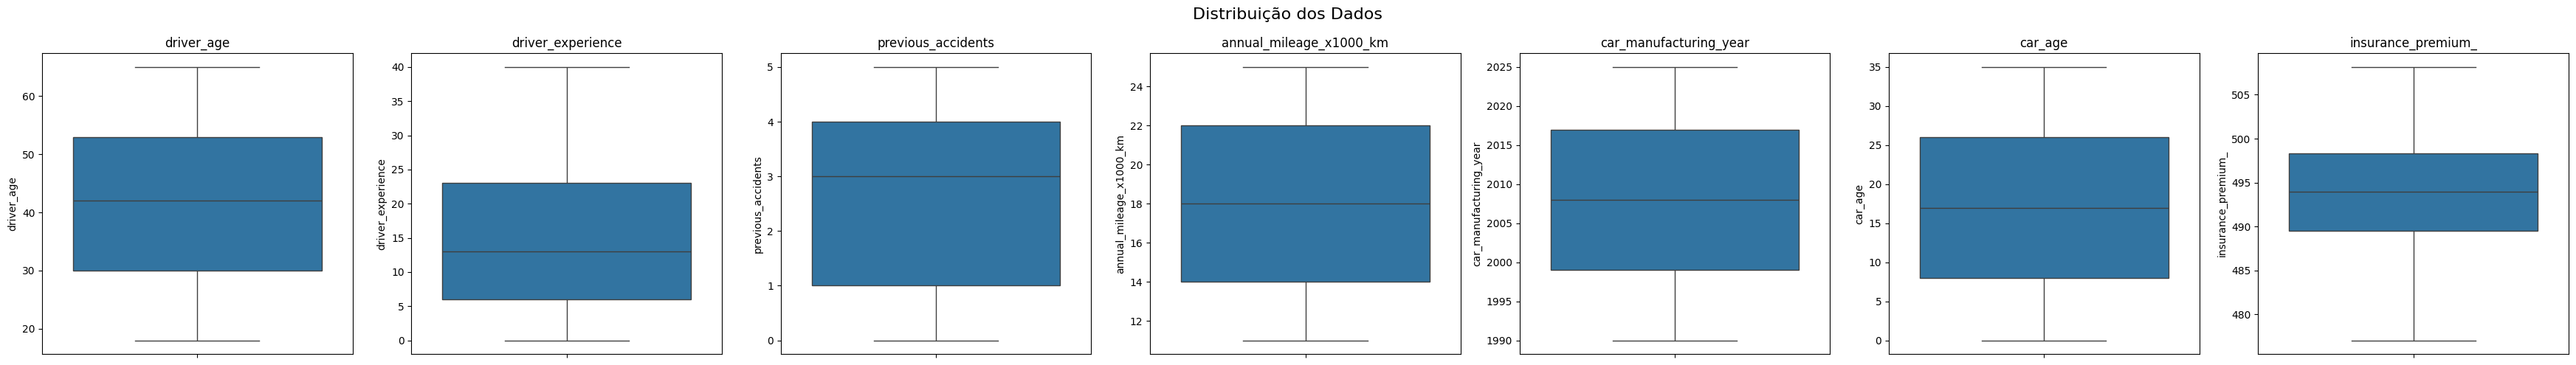

None

Dataframe de Teste: 


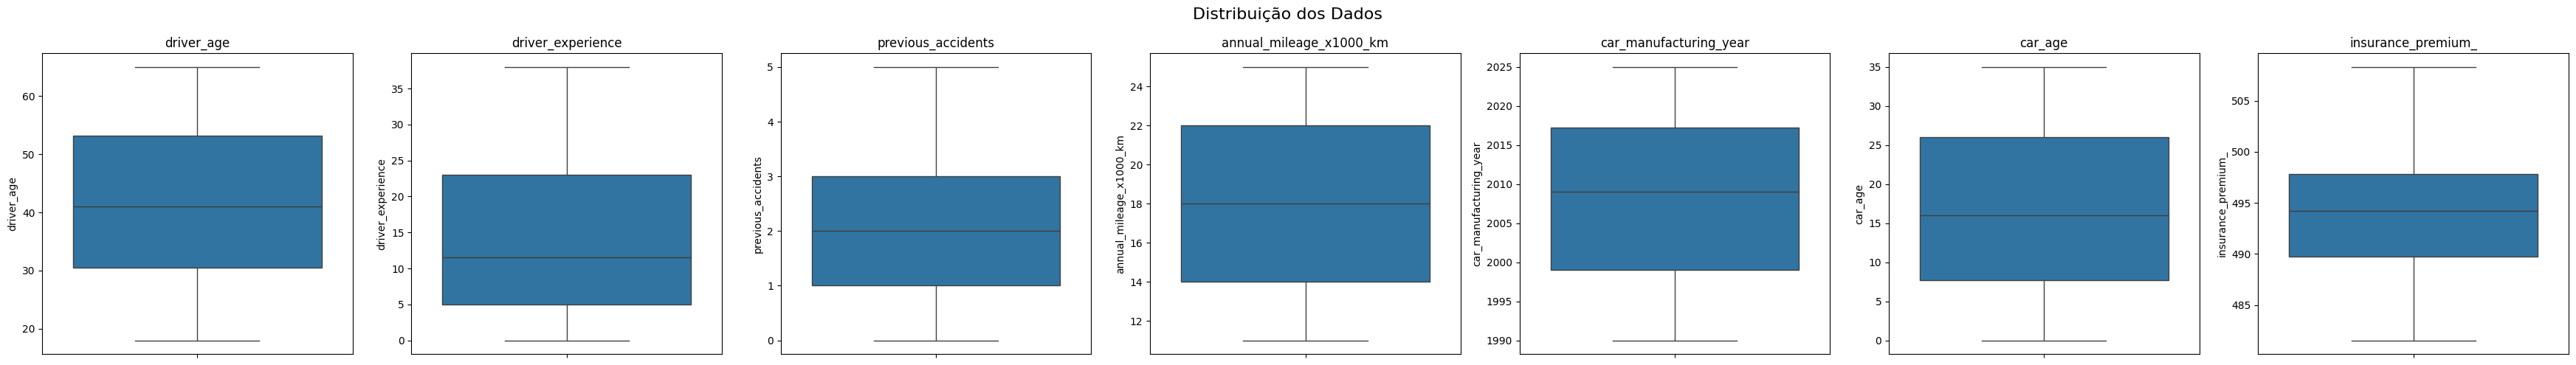

None

In [20]:
print("Dataframe de Treino: ")
display(gerar_boxplots(df_car_2, nome_colunas, titulo="Distribuição dos Dados")
)
print("Dataframe de Teste: ")
display(gerar_boxplots(df_car_teste_2, nome_colunas, titulo="Distribuição dos Dados")
)

## Salvar csv tratados

In [ ]:
df_car_teste_2.to_csv("..\dataset\dataset_silver\df_car_teste_2.csv", index=False, encoding="utf-8")
df_car_2.to_csv("..\dataset\dataset_silver\df_car_2.csv", index=False, encoding="utf-8")